In [17]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import cmocean

CMAP = cmocean.cm.balance
CMAP = seaborn.cm.icefire



In [18]:
def energy_specturm(u,v):
    # Script for the computation of 3D spectrum of the Total Kinetic Energy
    # Adapted to the Taylor-Green vortex (TGV) problem.
    # CREATED by FARSHAD NAVAH
    # McGill University
    # farshad.navah .a.t. mail.mcgill.ca
    # 2018
    # provided as is with no garantee.
    # Please cite:
    #    https://github.com/fanav/Energy_Spectrum
    #    https://arxiv.org/abs/1809.03966

    # -----------------------------------------------------------------
    #  IMPORTS - ENVIRONMENT
    # -----------------------------------------------------------------

    import numpy as np
    import matplotlib.pyplot as plt
    import time
    from math import sqrt

    # -----------------------------------------------------------------
    #  TGV QUANTS
    # -----------------------------------------------------------------

    # These quantities are to account for particular non-dimensionalizations of state variables.
    # In general U0=1.
    c  = sqrt(1.4);
    Ma = 0.1;
    U0 = 1.0; 

    #load the ascii file
    data = np.stack((u,v),axis=1)

    print ("shape of data = ",data.shape)

    localtime = time.asctime( time.localtime(time.time()) )
    print ("Reading files...localtime",localtime, "- END\n")

    # -----------------------------------------------------------------
    #  COMPUTATIONS
    # -----------------------------------------------------------------
    localtime = time.asctime( time.localtime(time.time()) )
    print ("Computing spectrum... ",localtime)

    N = data.shape[-1]
    print("N =",N)
    eps = 1e-16 # to void log(0)

    U = data[:,0].mean(axis=0)
    V = data[:,1].mean(axis=0)
    # U = data[:,3].reshape(N,N,N)/U0
    # V = data[:,4].reshape(N,N,N)/U0
    # W = data[:,5].reshape(N,N,N)/U0

    amplsU = abs(np.fft.fftn(U)/U.size)
    amplsV = abs(np.fft.fftn(V)/V.size)
    print(f"amplsU.shape = {amplsU.shape}")
    # amplsW = abs(np.fft.fftn(W)/W.size)

    EK_U  = amplsU**2
    EK_V  = amplsV**2 
    # EK_W  = amplsW**2 

    EK_U = np.fft.fftshift(EK_U)
    EK_V = np.fft.fftshift(EK_V)
    # EK_W = np.fft.fftshift(EK_W)

    sign_sizex = np.shape(EK_U)[0]
    sign_sizey = np.shape(EK_U)[1]
    # sign_sizez = np.shape(EK_U)[2]

    box_sidex = sign_sizex
    box_sidey = sign_sizey
    # box_sidez = sign_sizez

    # box_radius = int(np.ceil((np.sqrt((box_sidex)**2+(box_sidey)**2+(box_sidez)**2))/2.)+1)
    box_radius = int(np.ceil((np.sqrt((box_sidex)**2+(box_sidey)**2))/2.)+1)
    centerx = int(box_sidex/2)
    centery = int(box_sidey/2)
    # centerz = int(box_sidez/2)

    print ("box sidex     =",box_sidex) 
    print ("box sidey     =",box_sidey) 
    # print ("box sidez     =",box_sidez)
    print ("sphere radius =",box_radius )
    print ("centerbox     =",centerx)
    print ("centerboy     =",centery)
    # print ("centerboz     =",centerz,"\n" )
                    
    EK_U_avsphr = np.zeros(box_radius,)+eps ## size of the radius
    EK_V_avsphr = np.zeros(box_radius,)+eps ## size of the radius
    # EK_W_avsphr = np.zeros(box_radius,)+eps ## size of the radius

    # for i in range(box_sidex):
    # 	for j in range(box_sidey):
    # 		for k in range(box_sidez):            
    # 			wn =  int(np.round(np.sqrt((i-centerx)**2+(j-centery)**2+(k-centerz)**2)))
    # 			EK_U_avsphr[wn] = EK_U_avsphr [wn] + EK_U [i,j,k]
    # 			EK_V_avsphr[wn] = EK_V_avsphr [wn] + EK_V [i,j,k]    
    # 			EK_W_avsphr[wn] = EK_W_avsphr [wn] + EK_W [i,j,k]        
    for i in range(box_sidex):
        for j in range(box_sidey):          
            wn =  int(np.round(np.sqrt((i-centerx)**2+(j-centery)**2)))
            EK_U_avsphr[wn] = EK_U_avsphr [wn] + EK_U [i,j]
            EK_V_avsphr[wn] = EK_V_avsphr [wn] + EK_V [i,j]     
    EK_avsphr = 0.5*(EK_U_avsphr + EK_V_avsphr)
                            
    fig = plt.figure()
    plt.title("Kinetic Energy Spectrum")
    plt.xlabel(r"k (wavenumber)")
    plt.ylabel(r"TKE of the k$^{th}$ wavenumber")

    realsize = len(np.fft.rfft(U[:,0]))
    print(realsize)
    plt.loglog(np.arange(0,realsize),((EK_avsphr[0:realsize] )),'k')
    plt.loglog(np.arange(realsize,len(EK_avsphr),1),((EK_avsphr[realsize:] )),'k--')
    axes = plt.gca()
    # axes.set_ylim([10**-25,5**-1])

    print("Real      Kmax    = ",realsize)
    print("Spherical Kmax    = ",len(EK_avsphr))

    TKEofmean_discrete = 0.5*(np.sum(U/U.size)**2+np.sum(V/V.size)**2)
    TKEofmean_sphere   = EK_avsphr[0]

    total_TKE_discrete = np.sum(0.5*(U**2+V**2))/(N*1.0)**2 # average over whole domaon / divied by total pixel-value
    total_TKE_sphere   = np.sum(EK_avsphr)

    print("the KE  of the mean velocity discrete  = ",TKEofmean_discrete)
    print("the KE  of the mean velocity sphere    = ",TKEofmean_sphere )
    print("the mean KE discrete  = ",total_TKE_discrete)
    print("the mean KE sphere    = ",total_TKE_sphere)

    localtime = time.asctime( time.localtime(time.time()) )
    print ("Computing spectrum... ",localtime, "- END \n")

    # -----------------------------------------------------------------
    #  OUTPUT/PLOTS
    # -----------------------------------------------------------------

    dataout      = np.zeros((box_radius,2)) 
    dataout[:,0] = np.arange(0,len(dataout))
    dataout[:,1] = EK_avsphr[0:len(dataout)]


# Decay Turbulence

[ 4.90873852  4.92101037  4.93328221 ... 29.41561559 29.42788743
 29.44015928]
(2000, 128, 128)


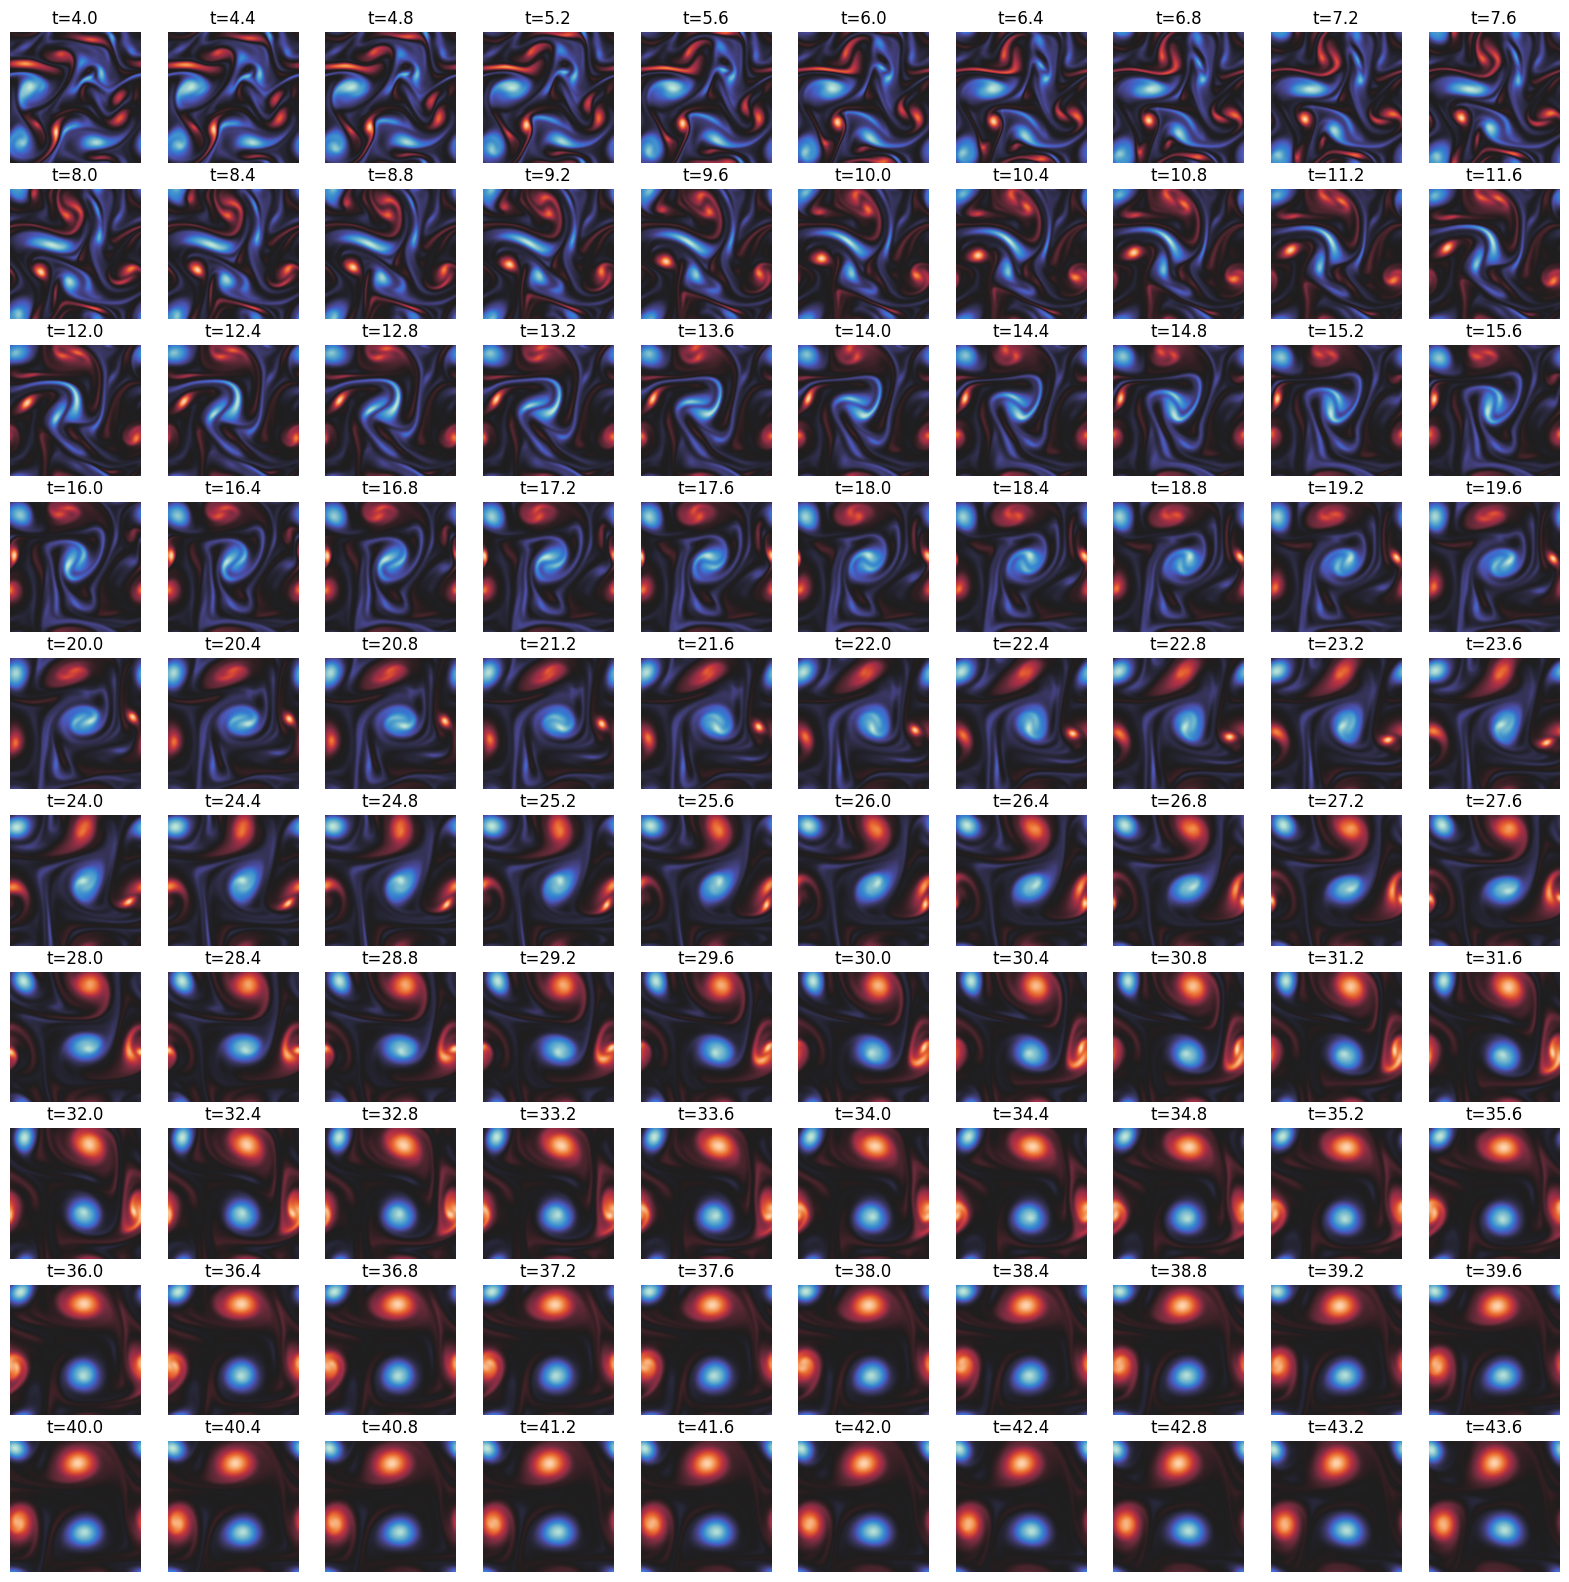

In [19]:
import h5py
# f = h5py.File('Decay_Turbulence_small/train/Decay_turb_small_128x128_125.h5','r')
# print(f['tasks']['u'].shape)
# w = f['tasks']['vorticity']
# fig,axs = plt.subplots(10,10,figsize=(20,20))
# i = 0
# for ax in axs:
#     for a in ax:
#         a.axis('off')
#         a.imshow(w[i*2],cmap=CMAP)
#         a.set_title(f"t={round(5+i*2*0.02,2)}")
#         i+=1

# f.close()
# import h5py
# f = h5py.File('Decay_Turbulence_small/train/Decay_turb_small_128x128_702.h5','r')
# print(f['tasks']['u'].shape)
# w = f['tasks']['vorticity']
# fig,axs = plt.subplots(10,10,figsize=(20,20))
# i = 0
# for ax in axs:
#     for a in ax:
#         a.axis('off')
#         a.imshow(w[i*20],cmap=CMAP)
#         a.set_title(f"t={4+round(i*20*0.02,1)}")
#         i+=1
# f.close()
import h5py
f = h5py.File('Decay_Turbulence_small/train/Decay_turb_small_128x128_7202.h5','r')
print(f['tasks']['t'][()])
print(f['tasks']['u'].shape)
w = f['tasks']['vorticity']
fig,axs = plt.subplots(10,10,figsize=(20,20))
i = 0
for ax in axs:
    for a in ax:
        a.axis('off')
        a.imshow(w[i*20],cmap=CMAP)
        a.set_title(f"t={4 + round(i*20*0.02,1)}")
        i+=1


In [20]:
import h5py
f = h5py.File('Burgers_2D_small/train/Burgers2D_128x128_161.h5','r')
print(f['tasks']['u'].shape)
print(f['tasks']['t'][()])
w = f['tasks']['u']
fig,axs = plt.subplots(10,10,figsize=(20,20))
i = 0
for ax in axs:
    for a in ax:
        a.axis('off')
        a.imshow(w[i*10],cmap=CMAP)
        a.set_title(f"t={round(i*10*0.001,4)}")
        i+=1
f.close()


# import h5py
# f = h5py.File('Burgers_2D/Burgers2D_128x128_33.h5','r')
# print(f['tasks']['u'].shape)
# w = f['tasks']['v']
# fig,axs = plt.subplots(10,10,figsize=(20,20))
# i = 0
# for ax in axs:
#     for a in ax:
#         a.axis('off')
#         a.imshow(w[i*10],cmap=CMAP)
#         a.set_title(f"t={round(i*10*0.001,4)}")
#         i+=1

# u = f['tasks']['u']
# v = f['tasks']['v']

# print(f"max u: {np.max(u):.4f}, min u: {np.min(u):.4f}")
# print(f"mean u: {np.mean(u):.4f}, std u: {np.std(u):.4f}")
# print(f"max v: {np.max(v):.4f}, min v: {np.min(v):.4f}")
# print(f"mean v: {np.mean(v):.4f}, std v: {np.std(v):.4f}")
# f.close()


(1001, 128, 128)
[0.00000000e+00 9.99000999e-04 1.99800200e-03 ... 9.98001998e-01
 9.99000999e-01 1.00000000e+00]


# Rayleigh Benard Convection 

In [ ]:
import h5py
f = h5py.File('RBC_small/train/RBC_small_165_s2.h5','r')
w = f['tasks']['vorticity']
print(w.shape)
print(f['scales/sim_time'][()])


fig,axs = plt.subplots(6,3,figsize=(16,9))
i = 0
for ax in axs:
    for a in ax:
        a.axis('off')
        a.imshow(w[i*20].T,cmap=CMAP,vmin=-10,vmax=10)
        a.set_title(f"t={round(20+i*20*0.01,2)}")
        i+=1

# import h5py
# f = h5py.File('RBC_small/train/RBC_small_9217_s2.h5','r')
# w = f['tasks']['vorticity']
# fig,axs = plt.subplots(10,10,figsize=(16,9))
# i = 0
# for ax in axs:
#     for a in ax:
#         a.axis('off')
#         a.imshow(w[i*20].T,cmap=CMAP,vmin=-10,vmax=10)
#         a.set_title(f"t={round(20+i*20*0.01,2)}")
#         i+=1

# import h5py
# f = h5py.File('RBC_small/train/RBC_small_161_s2.h5','r')
# w = f['tasks']['vorticity']
# fig,axs = plt.subplots(10,10,figsize=(16,9))
# i = 0
# for ax in axs:
#     for a in ax:
#         a.axis('off')
#         a.imshow(w[i*20].T,cmap=CMAP,vmin=-10,vmax=10)
#         a.set_title(f"t={round(20+i*20*0.01,2)}")
#         i+=1

# Energy Specturm

In [ ]:
import h5py
f = h5py.File('RBC_small/train/RBC_small_165_s2.h5','r')
w = f['tasks']['vorticity']
u = f['tasks']['u'][()]
v = f['tasks']['v'][()]
energy_specturm(u,v)

In [ ]:
import h5py
f = h5py.File('Burgers_2D_small/train/Burgers2D_128x128_161.h5','r')
u = f['tasks']['u'][()]
v = f['tasks']['v'][()]
energy_specturm(u,v)

In [ ]:

import h5py
f = h5py.File('Decay_Turbulence_small/train/Decay_turb_small_128x128_7202.h5','r')
u = f['tasks']['u'][()]
v = f['tasks']['v'][()]
energy_specturm(u,v)

In [ ]:
f = h5py.File('rbc_321_256_s9.h5','r')
print(f['scales/sim_time'][()])
w = f['tasks']['vorticity'][()]

f.close()
f = h5py.File('RBC_small/train/RBC_small_9217_s2.h5','r')
w2 = f['tasks']['vorticity'][()]
f.close()

print(w.shape)
print(w2.shape)
import numpy as np
import matplotlib.pyplot as plt

# Generate placeholder data
u_x = w.reshape(-1)
u_y = w2.reshape(-1)

# Calculate the joint histogram
histogram2D, xedges, yedges = np.histogram2d(u_x, u_y, bins=50, density=True)

# Plotting the joint PDF using a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(histogram2D, interpolation='nearest', origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', cmap='viridis')
plt.colorbar(label='Probability Density')
plt.xlabel('u_x Velocity')
plt.ylabel('u_y Velocity')
plt.title('Joint Probability Density Function of 2D Fluid Flow Velocity')
plt.tight_layout()
plt.show()

# import seaborn as sns
# prep_data =w.reshape(w.shape[0],-1)
# prep_data_hat = w2.reshape(w2.shape[0],-1)
# f, ax = plt.subplots(1)
# sns.distplot(prep_data, hist=False, kde=True, label='Original')
# sns.distplot(prep_data_hat, hist=False, kde=True, label='New')
# ax.set_xscale('log')
# ax.set_xbound(-1e-2,1e2)
# # Plot formatting
# plt.legend()
# plt.xlabel('Data Value')
# plt.ylabel('Data Density Estimate')

In [ ]:
# stat property for all datasets
print("****RBC****")
f = h5py.File('Dedalus/RBC_small_33/RBC_small_33_s2.h5','r')
print(f['scales/sim_time'][()])
w = f['tasks']['vorticity']
u = f['tasks']['u']
v = f['tasks']['v']
print(f"max w: {np.max(w):.2f}, min w: {np.min(w):.2f}")
print(f"mean w: {np.mean(w):4f}, std w: {np.std(w):.4f}")
print(f"max u: {np.max(u):.4f}, min u: {np.min(u):.4f}")
print(f"mean u: {np.mean(u):.4f}, std u: {np.std(u):.4f}")
print(f"max v: {np.max(v):.4f}, min v: {np.min(v):.4f}")
print(f"mean v: {np.mean(v):.4f}, std v: {np.std(v):.4f}")

print("****Decay Turbulence****")
f = h5py.File('Decay_Turbulence/Decay_turb_256x256_893.h5','r')

w = f['tasks']['vorticity']
u = f['tasks']['u']
v = f['tasks']['v']
print(f"max w: {np.max(w):.2f}, min w: {np.min(w):.2f}")
print(f"mean w: {np.mean(w):4f}, std w: {np.std(w):.4f}")
print(f"max u: {np.max(u):.4f}, min u: {np.min(u):.4f}")
print(f"mean u: {np.mean(u):.4f}, std u: {np.std(u):.4f}")
print(f"max v: {np.max(v):.4f}, min v: {np.min(v):.4f}")
print(f"mean v: {np.mean(v):.4f}, std v: {np.std(v):.4f}")